# Proyek Machine Learning System Design: Bank Customer Churn Prediction
- **Nama:** Muhammad Alif Alfattah Riu
- **Email:** alifalfattah12@gmail.com
- **ID Dicoding:** alif_riu

# **Import Library**

In [39]:
# Memanggil beberapa library dan packages yang digunakan di dalam proyek
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Data Loading**

In [3]:
# Download latest version
path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 26.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1


In [4]:
# membaca dataset
ds = '/root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv'
df = pd.read_csv(ds)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


# **Exploratory Data Analysis**

__Exploratory Data Analysis (EDA)__  adalah proses untuk memahami karakteristik data sebelum melakukan pemodelan.

## **EDA - Dekripsi Variabel**

In [5]:
# Melihat jumlah data pengamatan yang ada,jumlah kolom,tipe data pada masing masing kolom, dan memeriksa apakah ada missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [6]:
# memeriksa nilai dari statistik deskriptif pada dataset seperti mean,median,standar deviasi,dll.
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
# memeriksa jumlah missing value pada masing masing variabel
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
# memeriksa apakah ada data duplikat
df.duplicated().sum()

2

In [9]:
# melihat jumlah baris dan kolom pada dataset
df.shape

(10002, 14)

In [10]:
# variabel RowNumber,CustomerId, dan Surname akan di hapus karena tidak akan digunakan pada tahap analisis
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## **EDA - Handling Missing Value and Duplicate Value**

Mengisi nilai missing value dengan menggunakan metode ffill.Ini bertujuan untuk mengisi nilai baris yang kosong pada kolom `HasCrCard` dan `IsActiveMember` dengan nilai baris sebelumnya.

In [11]:
df['HasCrCard'] = df['HasCrCard'].fillna(method='ffill')
df['IsActiveMember'] = df['IsActiveMember'].fillna(method='ffill')

<ipython-input-11-e3840a4c9959>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['HasCrCard'] = df['HasCrCard'].fillna(method='ffill')
<ipython-input-11-e3840a4c9959>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['IsActiveMember'] = df['IsActiveMember'].fillna(method='ffill')


Variabel `Geography` bertipe data kategorikal sehingga dapat diisi nilainya dengan menggunakan modus yang ada pada kolom.Ini bertujuan untuk memperkecil Variasi data yang ada pada kolom.

In [12]:
geography_mode = df['Geography'].mode()[0]
df['Geography'].fillna(geography_mode, inplace=True)

<ipython-input-12-8f6678748318>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geography'].fillna(geography_mode, inplace=True)


Dikarenakan variabel `Age` bertipe numerik, dapat dilakukan proses handling missing value dengan menggantinya denga nilai median.Metode ini bertujuan untuk meminimalisir magnitude dari skew dan outlier pada kolom.

In [13]:
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)

<ipython-input-13-f76a7a9ffcd7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)


In [14]:
# pengecekan kembali nilai missing value pada tiap kolom
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [16]:
# drop baris yang memiliki nilai duplikat dari baris lain dan mengecek apakah nilai duplikat masih ada atau tidak
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## **EDA - Univariate Analysis**

Analisis ini memeriksa satu variabel pada satu waktu. Tujuannya untuk memahami distribusi, nilai rata-rata, varians, serta mendeteksi outliers.

### Categorical Features

In [17]:
# memisahkan kolom bertipe kategorikal
categorical_features = ['Geography', 'Gender']

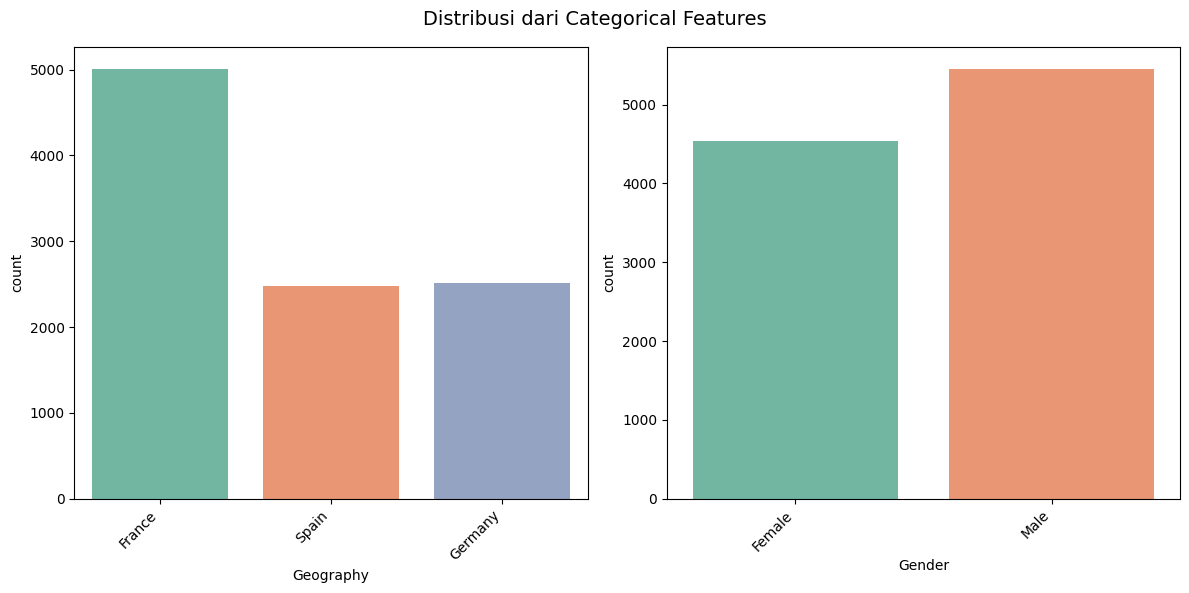

In [18]:
# Visualisasi persebaran data pada kolom kategorikal
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    ax = plt.subplot(1, len(categorical_features), i + 1)
    sns.countplot(data=df, x=feature, ax=ax, palette="Set2",hue=feature)
    plt.xticks(rotation=45, ha='right')
plt.suptitle("Distribusi dari Categorical Features", fontsize=14)
plt.tight_layout()
plt.show()

  __Insight__ : Distribusi dari dataset yang ada menunjukan bahwa `Geography` asal dari pelanggan berasal dari 3 negara yaitu France,Spain, dan Germany.
    Pada variabel `Gender`,terlihat bahwa jumlah pelanggan pria lebih dominan dibandingkan dengan pelanggan wanita.

### Numerical Features

In [19]:
# memisahkan data bertipe numerik
numerical_features = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Text(0.5, 1.0, 'Distribusi Exited/Churn ')

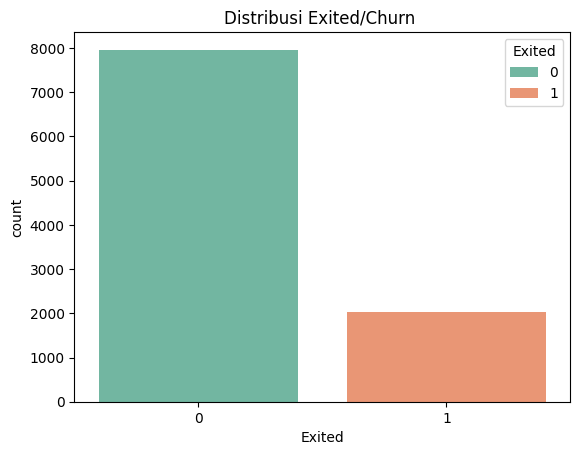

In [20]:
# visualisasi pada variabel Exited/churn
sns.countplot(x='Exited', data=df, palette='Set2',hue='Exited')
plt.title('Distribusi Exited/Churn ')

__Insight:__ Distribusi dari pelanggan yang sudah tidak berlangganan (1) terhadap pelanggan yang masih berlangganan (0) terlihat bahwa masih banyak pelanggan yang masih berlangganan.

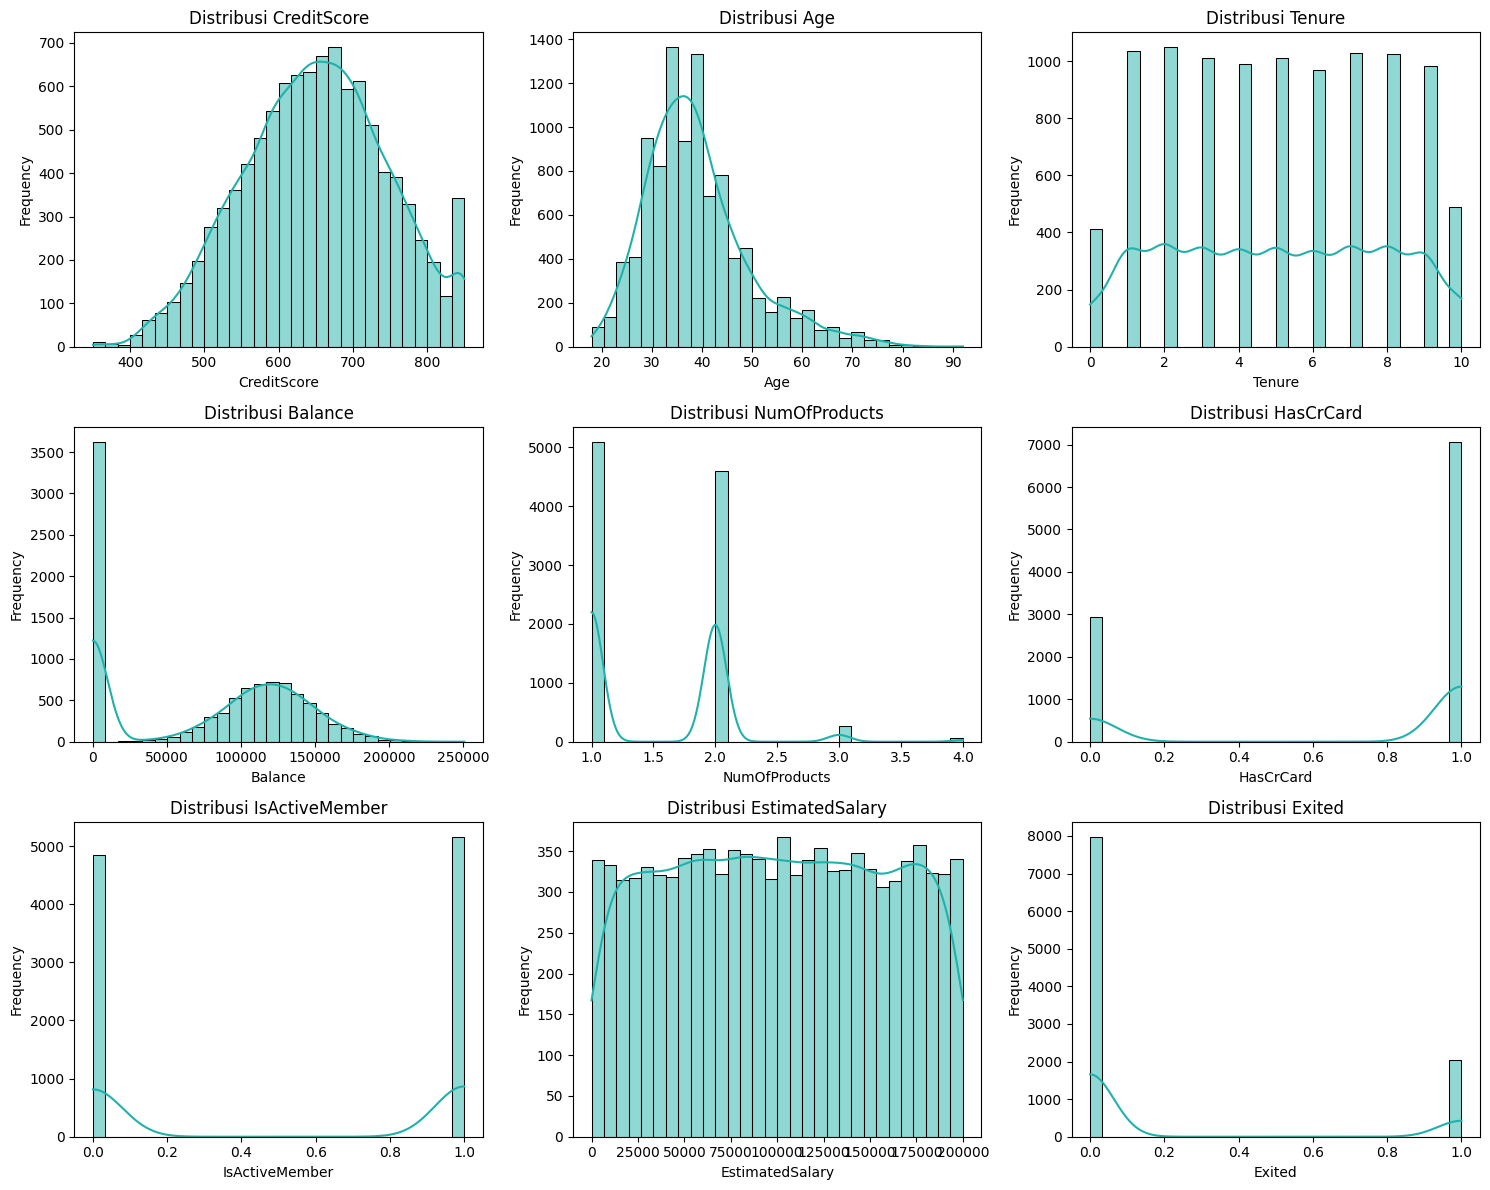

In [21]:
# visualisasi distribusi data pada tiap fitur numerik
def histplot_analysis(data, columns):
    plt.figure(figsize=(15, 12))

    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
        sns.histplot(data[column], kde=True, bins=30, color='lightseagreen')
        plt.title(f'Distribusi {column.replace("_", " ")}')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

histplot_analysis(df, numerical_features)

 Boxplot merupakan visualisasi yang efektif untuk mendeteksi data pencilan (outlier) pada variabel numerik. Dengan menampilkan kuartil data, boxplot memberikan gambaran jelas tentang sebaran data dan mengidentifikasi nilai-nilai ekstrem yang berada di luar jangkauan interkuartil. Titik-titik data yang terletak di luar 'kumis' boxplot umumnya dianggap sebagai outlier.
   Variabel Creditscore dan Age memiliki data outlier yang cukup banyak jika dibandingkan dengan variabel lainnya.

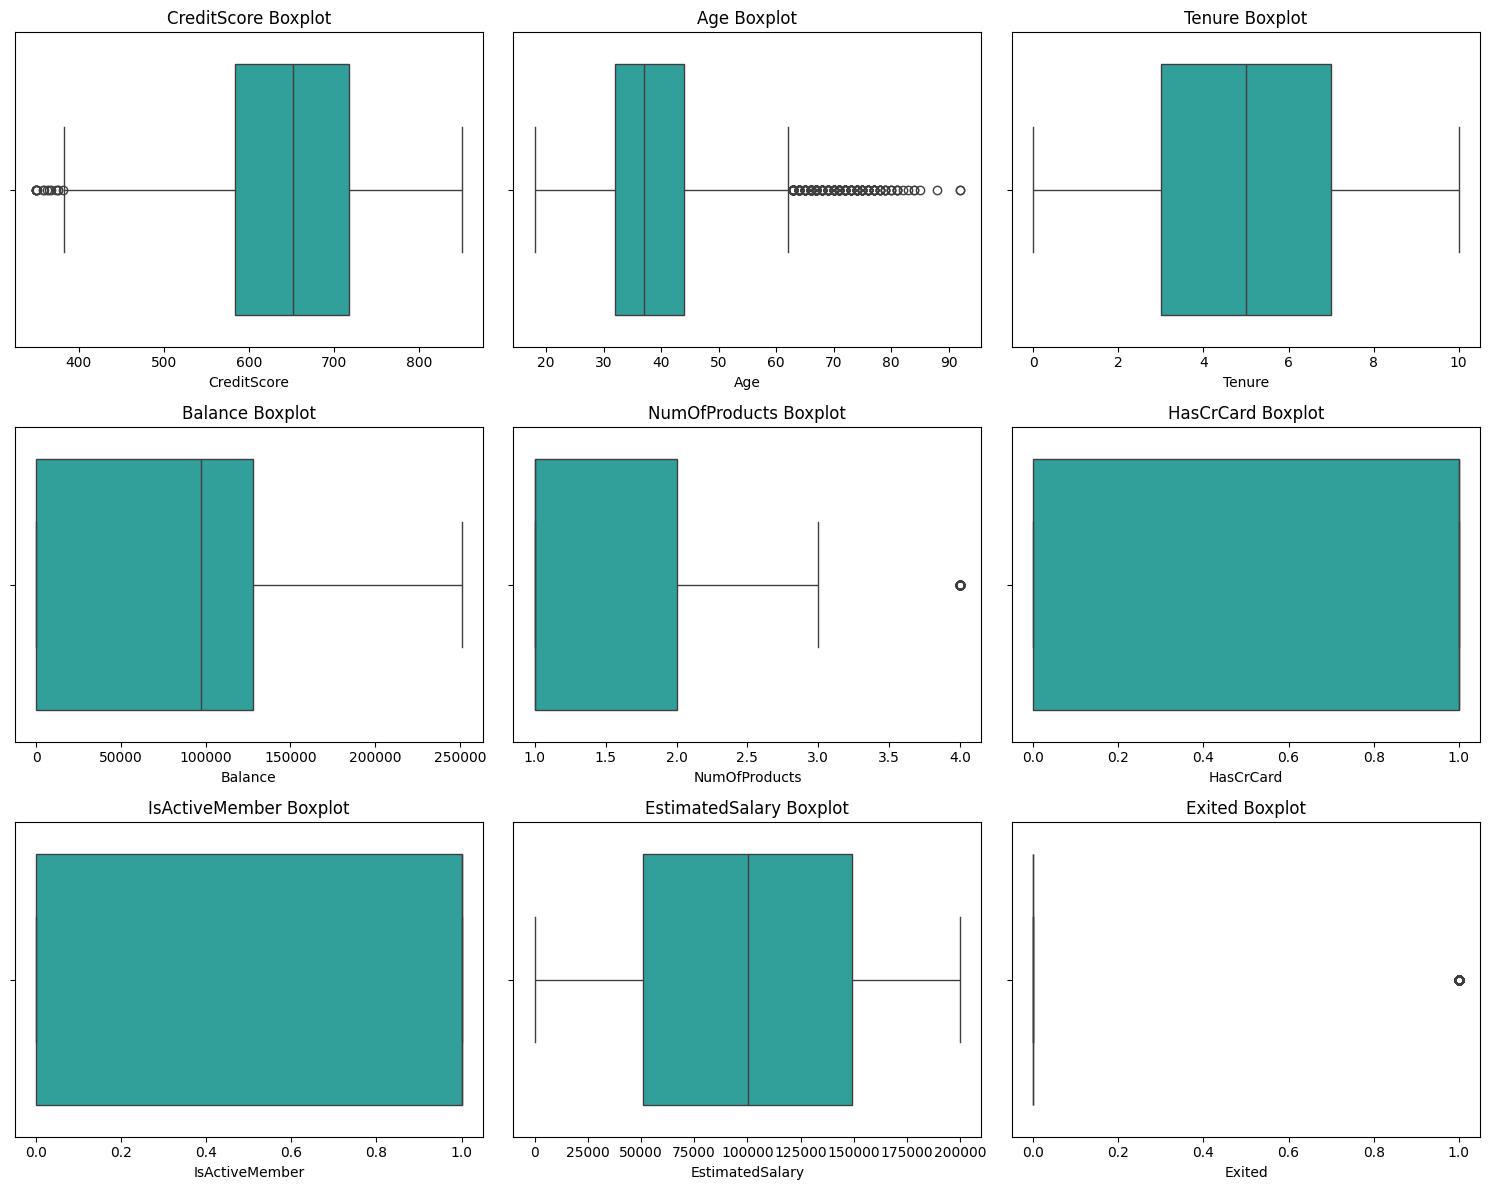

In [22]:
# visualisasi menggunakan boxplot untuk mencari niai outlier
def boxplot_analysis(data, columns):
    plt.figure(figsize=(15, 12))

    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=data[column], color='lightseagreen')
        plt.title(f'{column.replace("_", " ")} Boxplot')
        plt.xlabel(column.replace('_', ' '))


    plt.tight_layout()
    plt.show()

boxplot_analysis(df, numerical_features)

## **EDA - Bivariate Analysis**

Analisis ini mengevaluasi hubungan antara dua variabel. Tujuan utamanya adalah untuk menemukan korelasi atau pola antara dua fitur.

### **Categorical Features**

Text(0.5, 1.0, 'Distribusi Exited/Churn berdasarkan Geography')

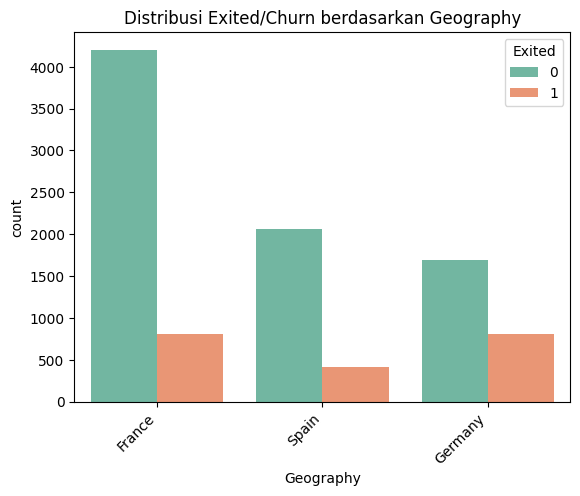

In [23]:
# visualisasi distribusi Exited/churn pelanggan berdasarkan geography
sns.countplot(data=df,x='Geography',hue='Exited',palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Exited/Churn berdasarkan Geography')

__Insight:__ bedasarkan persebaran churn berdasarkan geography,France menjadi negara terbanyak memiliki pelanggan loyal dan churn disaat yang bersamaan.

Text(0.5, 1.0, 'Distribusi Exited/Churn berdasarkan Gender')

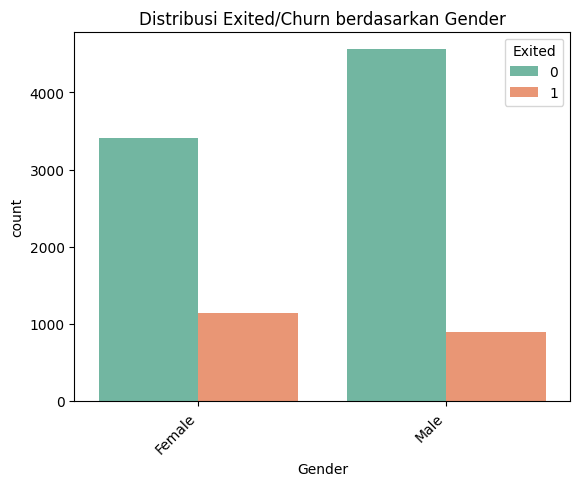

In [24]:
# visualisasi distribusi exited/churn pelanggan berdasarkan gender
sns.countplot(data=df,x='Gender',hue='Exited',palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Exited/Churn berdasarkan Gender')

__Insight:__ bedasarkan persebaran churn berdasarkan Gender,Wanita sedikit lebih banyak yang berhenti menggunakan layanan dibandingkan pria.

### **Numerical Features**

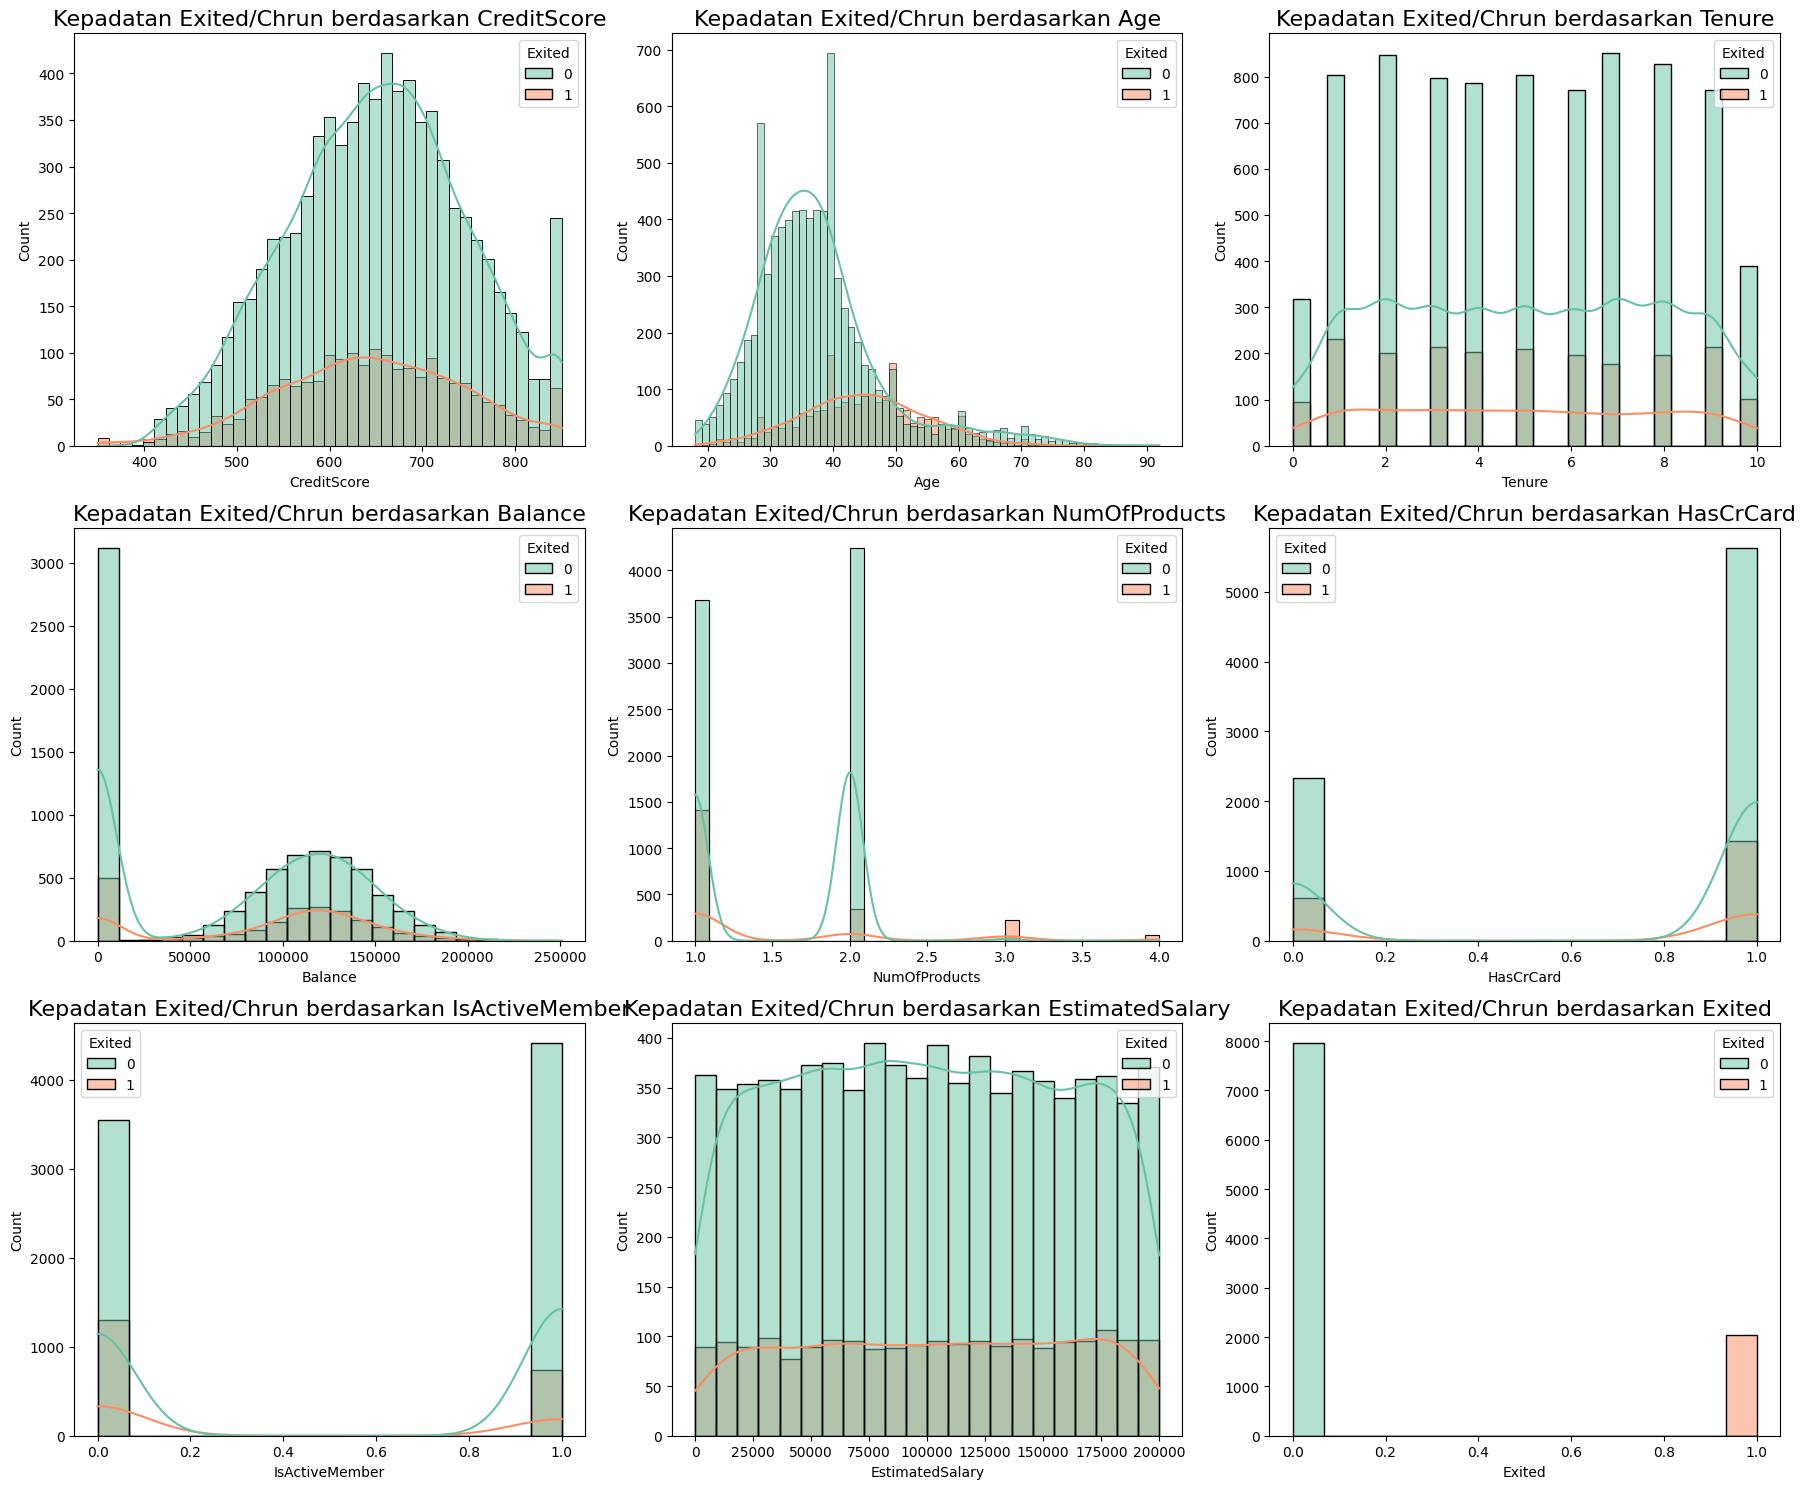

In [25]:
# visualisasi kepadatan pelanggan exited/churn berdasarkan fitur numerik
def density_plot(columns):
    plt.figure(figsize=(18, 15))
    num_plots = len(numerical_features)
    rows, cols = 3, min(3, num_plots)

    for i, column in enumerate(numerical_features):
        ax = plt.subplot(rows, cols, i + 1)
        sns.histplot(data=df, x=column, hue='Exited', kde=True, fill=True, palette='Set2', ax=ax)
        ax.set_title(f'Kepadatan Exited/Chrun berdasarkan {column}', fontsize=16)
        ax.set_xlabel(f'{column}')

    plt.tight_layout()
    plt.show()

density_plot(numerical_features)

Density plot merupakan visualisasi yang berguna untuk menggambarkan distribusi dari kepadatan suatu variabel.Berdasarkan data yang ada,kepadatan dari pelanggan yang tidak churn pada masing masing variabel lebih banyak jika dibandingkan dengan pelanggan yang churn.

## **EDA - Multivariate Analysis**

Analisis ini melibatkan lebih dari dua variabel sekaligus. Ini bertujuan untuk melihat interaksi kompleks antar variabel dan pola tersembunyi dalam data.

### **Categorical Features**

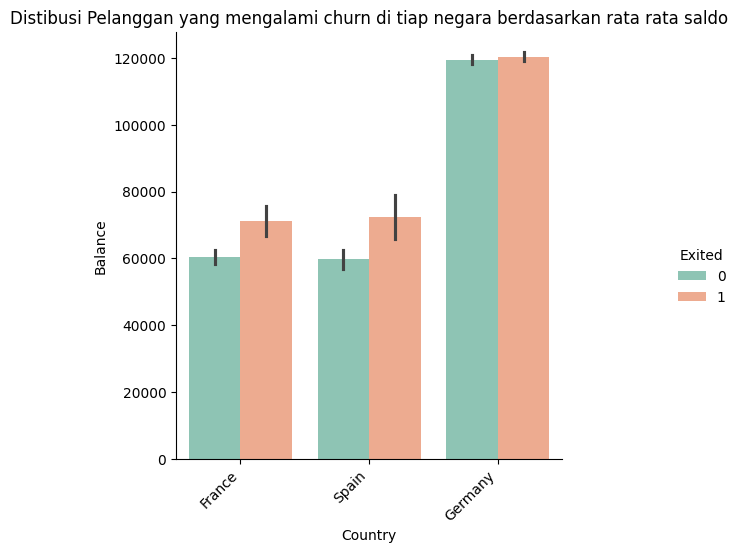

In [26]:
# visualisasi DIstibusi Pelanggan yang mengalami churn di tiap negara berdasarkan rata rata saldo
sns.axes_style('whitegrid')
g = sns.catplot(x='Geography', y='Balance', data=df, hue='Exited', kind='bar', palette='Set2', alpha=0.8, height=5)
plt.title('Distibusi Pelanggan yang mengalami churn di tiap negara berdasarkan rata rata saldo')
g.set_axis_labels('Country', 'Balance')
plt.xticks(rotation=45, ha='right')
plt.show()

 __Insight:__ Dari Rata-rata saldo pelangan di tiap Negara,German menjadi negarara yang memiliki rata-rata saldo tertinggi diantara dua negara yang lain.

### **Numerical Features**

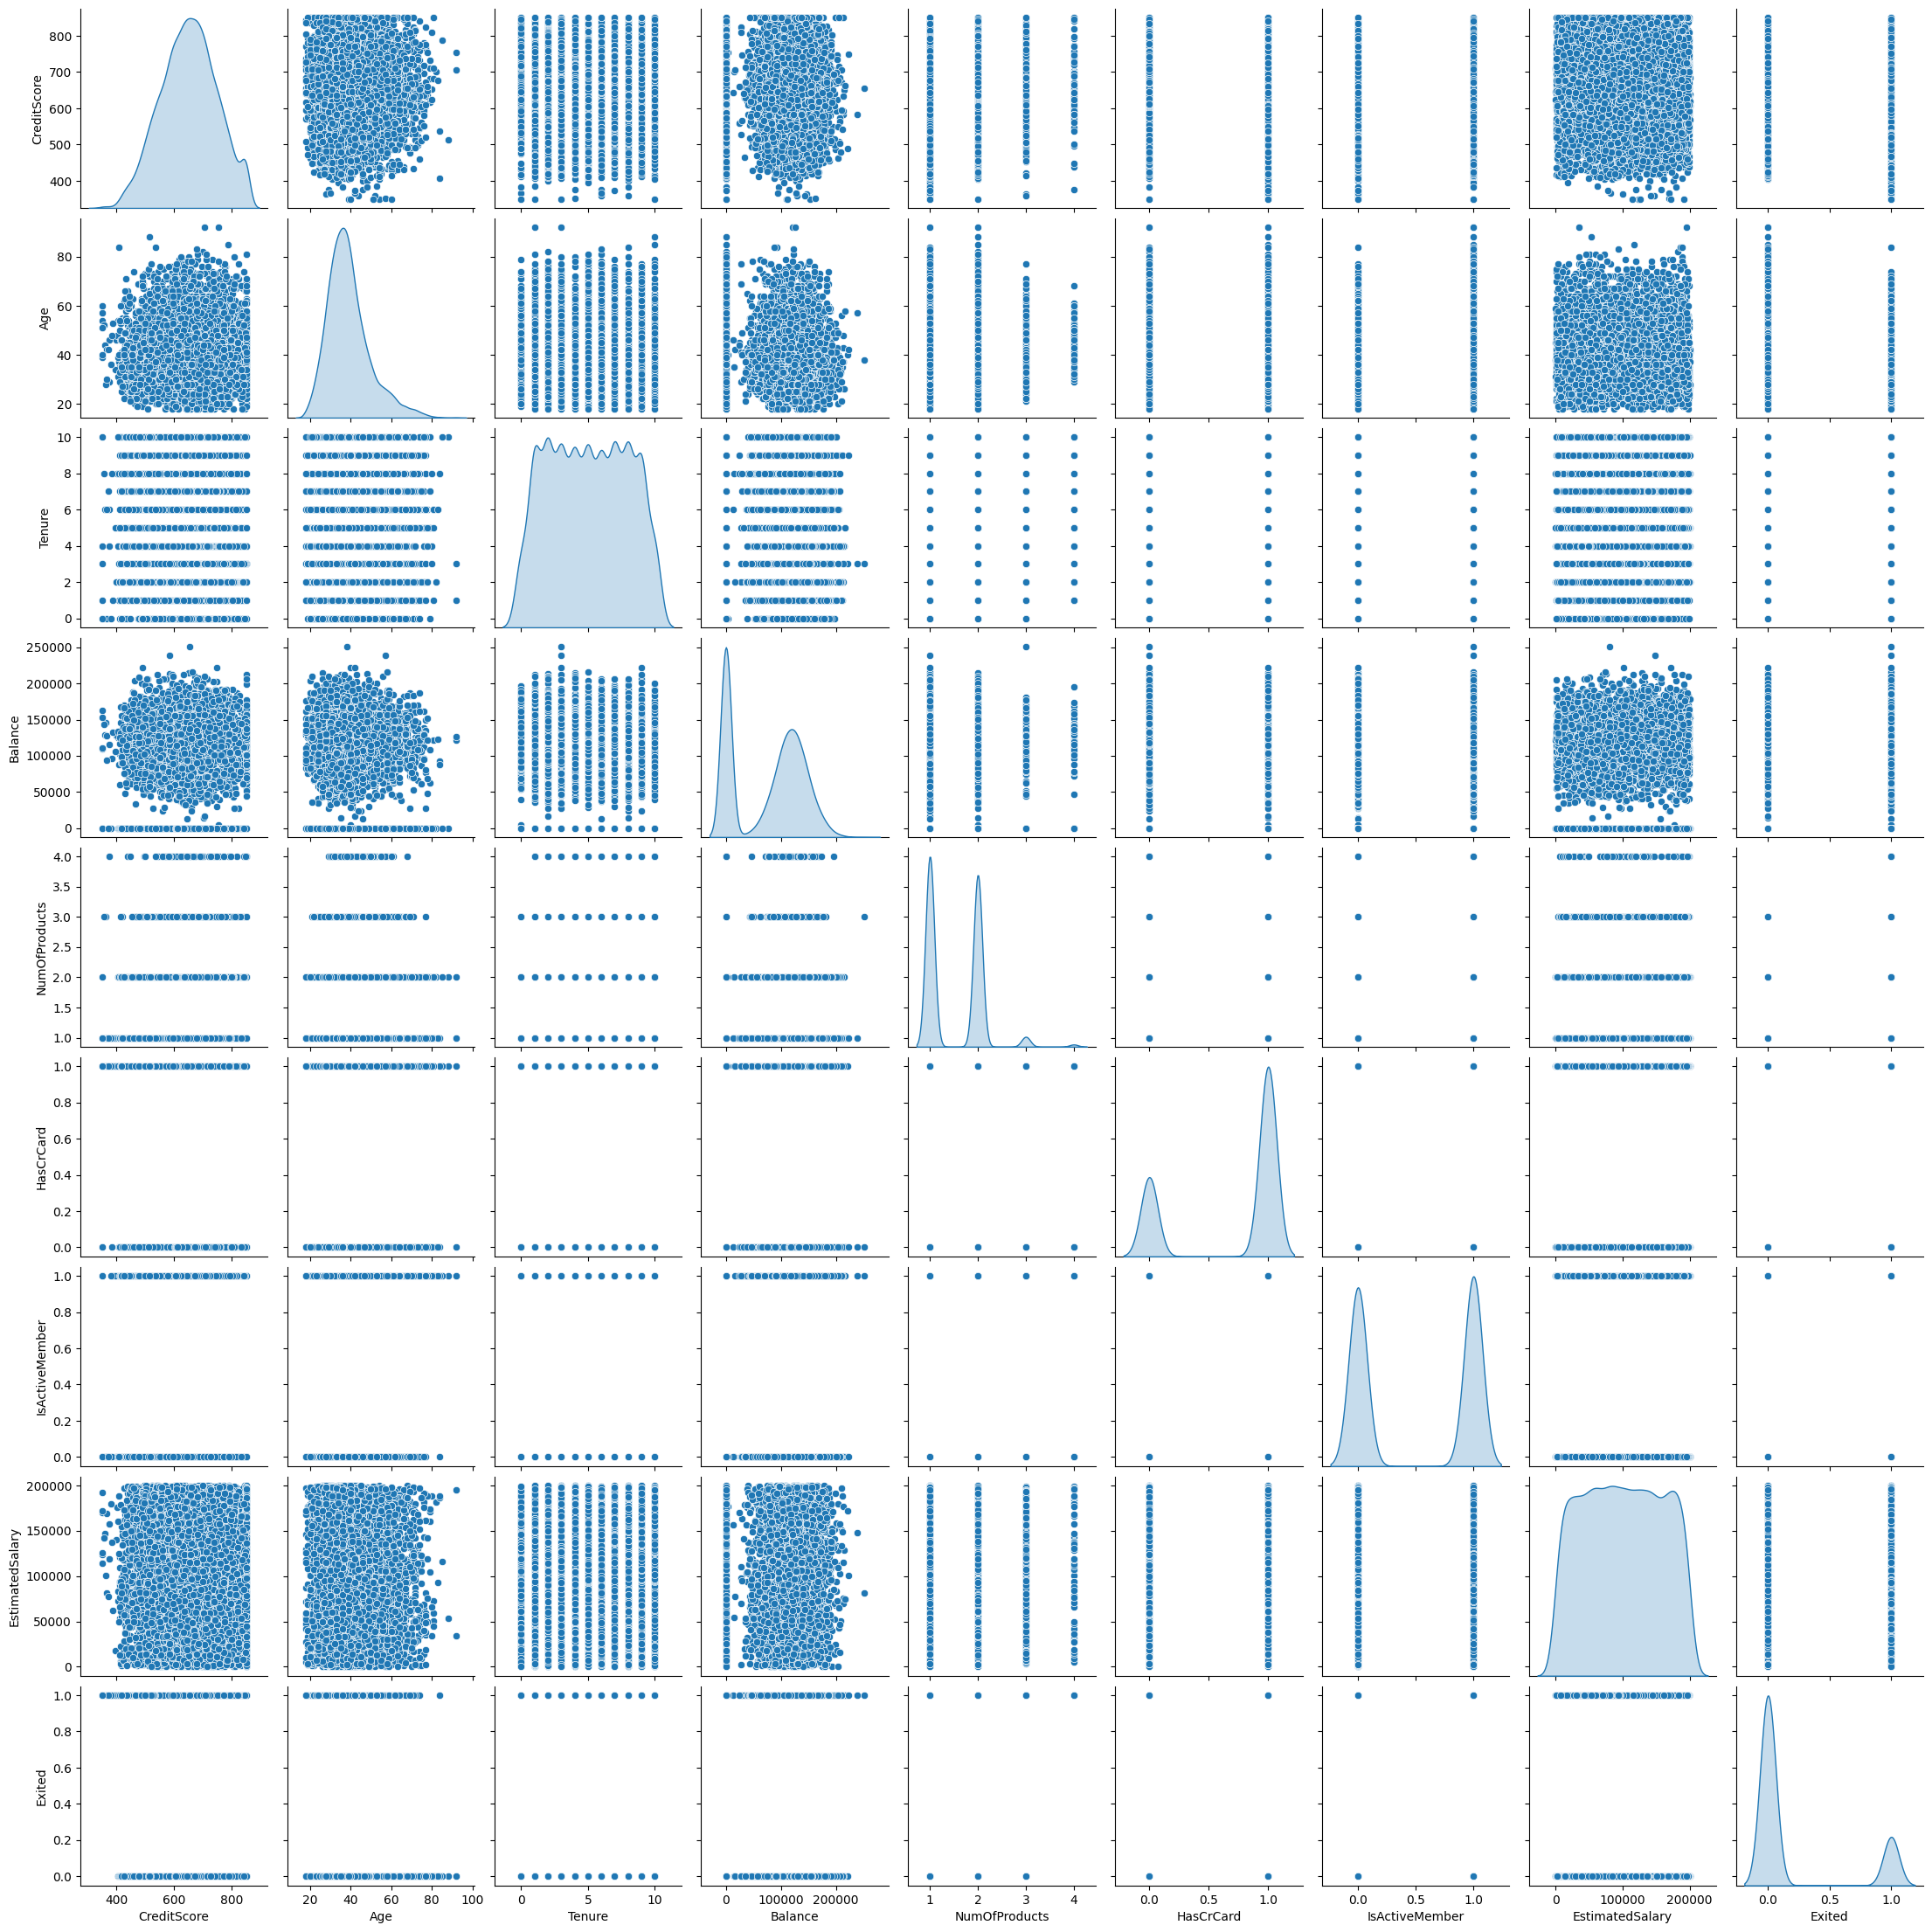

In [27]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

In [28]:
numerical_features = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
categorical_features = ['Geography', 'Gender']

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

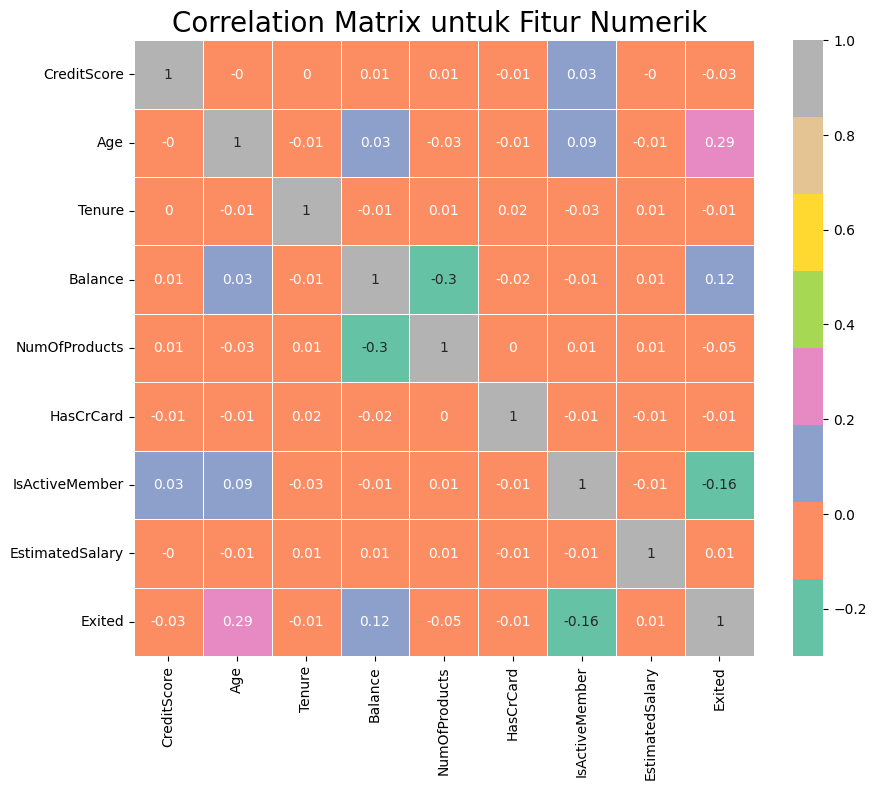

In [29]:
# membuat heatmap untuk melihat korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='Set2', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

 __Insight:__ berdasarkan visualisasi diatas,hubungan korelasi antar variabel bisa dibilang cukup rendah.

# **Data Preparation**

## **Enkoding Fitur Kategorical**

Untuk memungkinkan algoritma machine learning memproses kolom bertipe data kategorikal seperti 'Geography' dan 'Gender', kita perlu mengubahnya menjadi format numerik. Proses ini disebut encoding. Setiap kategori unik dalam variabel tersebut akan diubah menjadi vektor biner, di mana hanya satu nilai yang akan bernilai 1 (true) dan sisanya 0. Dengan demikian, informasi dari variabel kategorikal dapat dimasukkan secara efektif ke dalam model.

In [30]:
df = pd.get_dummies(df, columns=['Geography','Gender'],dtype=int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0,1,0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1,1,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0,1,0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0,1,0
4,850,43.0,2,125510.82,1,0.0,1.0,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39.0,5,0.00,2,1.0,0.0,96270.64,0,1,0,0,0,1
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0,1,0,0,0,1
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,1,0,0,1,0
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0,1,0,0,1


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

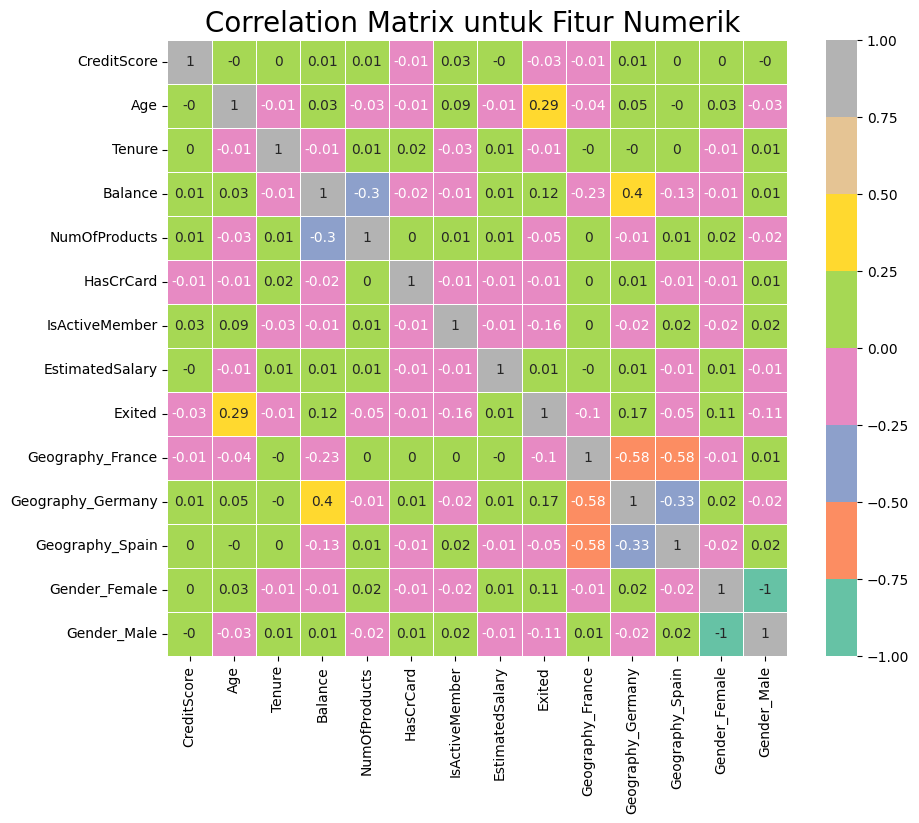

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='Set2', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## **Oversample minority data class**

Teknik resample data adalah suatu metode yang digunakan dalam pra-pemrosesan data, khususnya dalam Machine Learning, untuk mengatasi ketidakseimbangan kelas (imbalanced class) dalam dataset. Ketidakseimbangan kelas terjadi ketika jumlah data pada satu kelas jauh lebih banyak daripada kelas lainnya. Kondisi ini dapat menyebabkan model Machine Learning menjadi bias terhadap kelas mayoritas dan mengabaikan kelas minoritas.

In [32]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


Pada data yang tersedia, label data pelanggan yang tidak churn (0) lebih dominan dibandingkan dengan label data pelanggan yang churn sehingga kita perlu melakukan proses Resample pada label data pelanggan `churn = 1`

In [33]:
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,
                                n_samples=len(majority_class),
                                random_state=42)

# Combine the majority class with the oversampled minority class
df = pd.concat([majority_class, minority_oversampled])

In [34]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,7963


setelah dilakukan teknik resample, kedua label menjadi balance sehingga siap untuk masuk ke pemrosesan data tahap berikutnya

## **Splitting dan Standardisasi data**

Tujuan utama dari kasus ini  adalah memprediksi apakah pelanggan akan churn atau tidak (variabel 'Exited'). Untuk mencapai tujuan ini, kita akan membagi data menjadi dua bagian: 80% untuk melatih model (train set) dan 20% untuk menguji performanya (test set). Train set digunakan untuk mengajarkan model mengenali pola yang mengindikasikan churn, sedangkan test set digunakan untuk mengukur seberapa akurat model dalam memprediksi pelanggan baru yang akan churn.

In [35]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [36]:
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (12740, 13), (12740,)
Testing Set: (3186, 13), (3186,)


Standarisasi data menggunakan StandardScaler bertujuan untuk menormalkan distribusi setiap fitur agar memiliki rata-rata sama dengan nol dan penyimpangan baku sama dengan satu. Teknik ini memastikan bahwa semua fitur berkontribusi secara setara dalam model.

In [37]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modelling**

Model yang digunakan dalam proses pemodelan antara lain Decision Tree Classifier,Support Vector Machine, dan Random Forest Classifier.

Metrik Evaluasi yang akan diukur adalah Accuracy pada data train dan data test

In [38]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['Train_Accuracy', 'test_Accuracy'],
                      columns=['DecisionTree', 'SVM', 'RandomForest',])

## **Decision Tree**

In [43]:
dec_tree = DecisionTreeClassifier()

kombinasi_hyperparams_dectree = {
    'max_depth' : [None,2,3,4],
    'min_samples_leaf':[10,20,50],
}
dec_tree = GridSearchCV(dec_tree,
                          param_grid=kombinasi_hyperparams_dectree,
                          n_jobs=-1,
                          verbose=1)

dec_tree.fit(X_train, y_train)

y_test_pred = dec_tree.predict(X_test)
y_train_pred = dec_tree.predict(X_train)

models.loc['train_Accuracy','DecisionTree'] = accuracy_score(y_pred = y_train_pred, y_true=y_train)

print('----Accuracy Score----')
print('Hyper perameter terbaik : ',dec_tree.best_params_)
print('Accuracy Training : {:.2f}'.format(accuracy_score(y_train, y_train_pred) * 100), '%')
print('Accuracy Testing : {:.2f}'.format(accuracy_score(y_test, y_test_pred) * 100), '%')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
----Accuracy Score----
Hyper perameter terbaik :  {'max_depth': None, 'min_samples_leaf': 10}
Accuracy Training : 89.20 %
Accuracy Testing : 82.89 %


In [44]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1593
           1       0.82      0.85      0.83      1593

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



Confusion Matrix Testing : 
 [[1288  305]
 [ 240 1353]]
True Positives : 1288
False Negatives : 305
False Positives : 240
True Negatives : 1353


<Axes: >

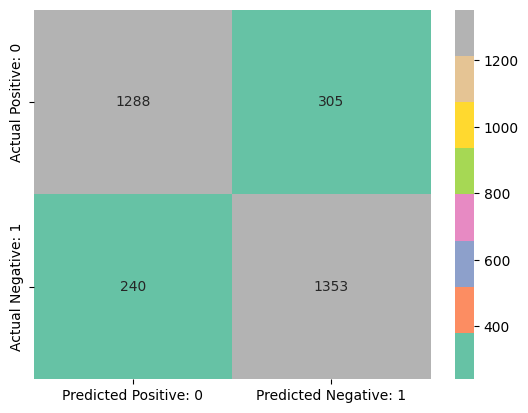

In [45]:
c_matrix_test_1 = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix Testing : \n', c_matrix_test_1)
print('True Positives :', c_matrix_test_1[0][0])
print('False Negatives :', c_matrix_test_1[0][1])
print('False Positives :', c_matrix_test_1[1][0])
print('True Negatives :', c_matrix_test_1[1][1])

matrix = pd.DataFrame(c_matrix_test_1, index=['Actual Positive: 0', 'Actual Negative: 1'], columns=['Predicted Positive: 0', 'Predicted Negative: 1'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='Set2')

## **Support Vector Machine**

In [46]:
SVM = SVC()

kombinasi_hyperparams_svm = {
    'C' : [0.001, 0.01, 0.1, 1],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale','auto']
}

SVM = GridSearchCV(SVM,
                   param_grid=kombinasi_hyperparams_svm,
                   n_jobs=-1,
                   verbose=1)

SVM.fit(X_train, y_train)

y_test_pred = SVM.predict(X_test)
y_train_pred = SVM.predict(X_train)
models.loc['train_Accuracy','SVM'] = accuracy_score(y_pred = y_train_pred, y_true=y_train)

print('----Accuracy Score----')
print('Hyper perameter terbaik : ',SVM.best_params_)
print('Accuracy Training : {:.2f}'.format(accuracy_score(y_train, y_train_pred) * 100), '%')
print('Accuracy Testing : {:.2f}'.format(accuracy_score(y_test, y_test_pred) * 100), '%')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
----Accuracy Score----
Hyper perameter terbaik :  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy Training : 81.15 %
Accuracy Testing : 79.69 %


In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1593
           1       0.80      0.79      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



Confusion Matrix Testing : 
 [[1284  309]
 [ 338 1255]]
True Positives : 1284
False Negatives : 309
False Positives : 338
True Negatives : 1255


<Axes: >

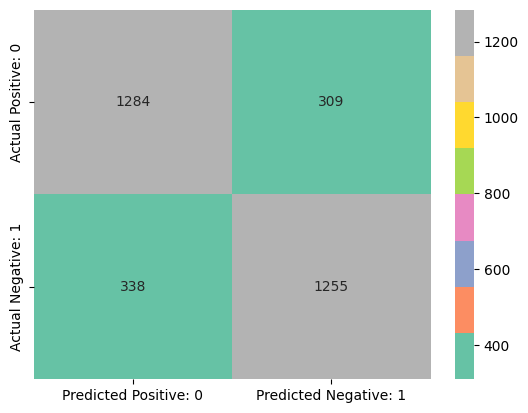

In [48]:
c_matrix_test_2 = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix Testing : \n', c_matrix_test_2)
print('True Positives :', c_matrix_test_2[0][0])
print('False Negatives :', c_matrix_test_2[0][1])
print('False Positives :', c_matrix_test_2[1][0])
print('True Negatives :', c_matrix_test_2[1][1])

matrix = pd.DataFrame(c_matrix_test_2, index=['Actual Positive: 0', 'Actual Negative: 1'], columns=['Predicted Positive: 0', 'Predicted Negative: 1'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='Set2')

## **Random Forest**

In [49]:
RF = RandomForestClassifier()

kombinasi_hyperparams_rf = {
    'n_estimators':[50,100,200],
    'max_depth' : [None,2,3,4],
    'min_samples_leaf':[10,20,50],
}

RF = GridSearchCV(RF,
                  param_grid=kombinasi_hyperparams_rf,
                  n_jobs=-1,
                  verbose=1)

RF.fit(X_train, y_train)

y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

models.loc['train_Accuracy','RandomForest'] = accuracy_score(y_pred = y_train_pred, y_true=y_train)

print('----Accuracy Score----')
print('Hyper perameter terbaik : ',RF.best_params_)
print('Accuracy Training : {:.2f}'.format(accuracy_score(y_train, y_train_pred) * 100), '%')
print('Accuracy Testing : {:.2f}'.format(accuracy_score(y_test, y_test_pred) * 100), '%')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
----Accuracy Score----
Hyper perameter terbaik :  {'max_depth': None, 'min_samples_leaf': 10, 'n_estimators': 200}
Accuracy Training : 90.46 %
Accuracy Testing : 85.62 %


In [50]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1593
           1       0.86      0.86      0.86      1593

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



Confusion Matrix Testing : 
 [[1363  230]
 [ 228 1365]]
True Positives : 1363
False Negatives : 230
False Positives : 228
True Negatives : 1365


<Axes: >

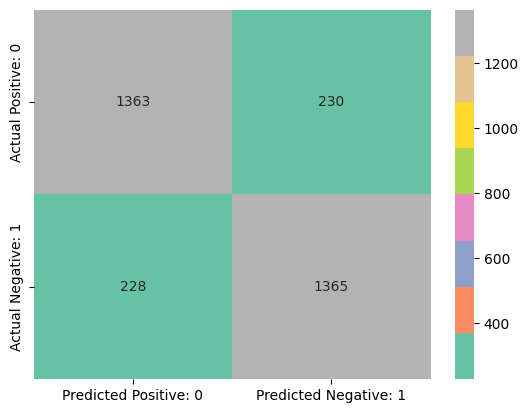

In [51]:
c_matrix_test_3 = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix Testing : \n', c_matrix_test_3)
print('True Positives :', c_matrix_test_3[0][0])
print('False Negatives :', c_matrix_test_3[0][1])
print('False Positives :', c_matrix_test_3[1][0])
print('True Negatives :', c_matrix_test_3[1][1])

matrix = pd.DataFrame(c_matrix_test_3, index=['Actual Positive: 0', 'Actual Negative: 1'], columns=['Predicted Positive: 0', 'Predicted Negative: 1'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='Set2')

# **Evaluasi Model**

In [52]:
acc = pd.DataFrame(columns=['train', 'test'], index=['DecisionTree','SVM','RandomForest'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'DecisionTree': dec_tree, 'SVM': SVM, 'RandomForest': RF}

for name, model in model_dict.items():
    acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    acc.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

# Panggil acc
acc

,train,test
DecisionTree,0.891994,0.828939
SVM,0.811538,0.796924
RandomForest,0.904553,0.856246


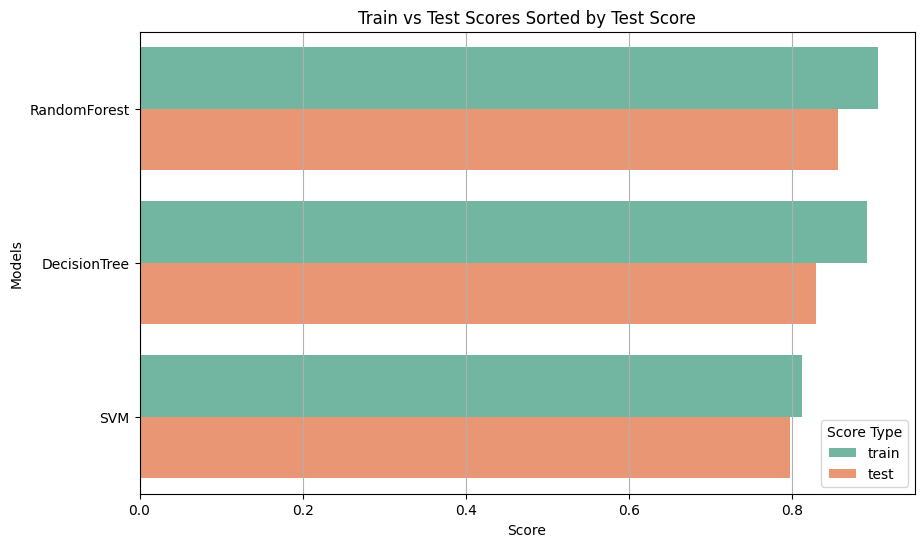

In [53]:
# Melakukan pivot agar data cocok untuk Seaborn
acc_sorted = acc.sort_values(by='test', ascending=False)
acc_long = acc_sorted.reset_index().melt(id_vars='index', value_vars=['train', 'test'], var_name='Type', value_name='Score')

# Membuat plot dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=acc_long,
    y='index',
    x='Score',
    hue='Type',
    palette='Set2',
    orient='h'
)

# Menambahkan grid, label, dan judul
plt.grid(axis='x', zorder=0)
plt.xlabel("Score")
plt.ylabel("Models")
plt.title("Train vs Test Scores Sorted by Test Score")
plt.legend(title='Score Type')

plt.show()

Secara keseluruhan, Random Forest menunjukkan performa terbaik dalam akurasi pada set test dan memiliki F1-Score tinggi untuk kedua kelas.Sementara itu, Support Vector Machine memiliki performa terendah dari segi akurasi.Decision Tree memberikan keseimbangan yang cukup baik antara precision, recall, dan F1-Score dengan akurasi yang cukup baik di set train dan set test.

Berdasarkan model yang dipilih,Random Forest merupakan model Random Forest yang terbaik dalam mengidentifikasi pelanggan yang berpotensi churn.